## 11.2 数値微分

In [1]:
# PDF印刷用
from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

try:
    from google.colab import files
except:
    pass

pdf_ind = 2
pdf_base = 'fig-11-'

def create_pdf():
    global pdf_ind, pdf_base
    fn = f'{pdf_base}{pdf_ind:02d}.pdf'
    print(fn)
    plt.rcParams['figure.subplot.bottom'] = 0.15
    plt.rcParams['figure.subplot.left'] = 0.15
    plt.savefig(fn)
    try:
        files.download(fn)
    except:
        pass
    pdf_ind = pdf_ind + 1

In [2]:
def graph_pdf(g):
    global pdf_ind, pdf_base
    fnbase = f'{pdf_base}{pdf_ind:02d}'
    fn = f'{pdf_base}{pdf_ind:02d}.pdf'
    print(fnbase)
    g.render(fnbase, view=False)
    try:
        files.download(fn)
    except:
        pass
    pdf_ind = pdf_ind + 1

### 必要ライブラリの導入

In [3]:
# 日本語化ライブラリ導入
!pip install japanize-matplotlib -qq
!pip install torchviz -qq
!pip install torchinfo -qq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 16.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [4]:
# 共通事前処理

# 必要ライブラリのimport
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# matplotlib日本語化対応
import japanize_matplotlib

# Numpyで浮動小数点表示を固定する
np.set_printoptions(formatter={'float': '{:0.3f}'.format})

# データフレーム表示用関数
from IPython.display import display

# pandasでの浮動小数点の表示精度
pd.options.display.float_format = '{:.3f}'.format

# 余分なワーニングを非表示にする
import warnings
warnings.filterwarnings('ignore')

In [5]:
# PyTorch関係ライブラリインポート
import torch
import torch.nn as nn
import torch.optim as optim
from torchinfo import summary
from torchviz import make_dot

### PyTorchによる数値微分サンプル

#### 2次関数の数値微分

In [6]:
# 2次関数の数値微分

# xをnumpy配列で定義
x_np = np.arange(-2, 2.1, 0.25)

#  勾配計算用変数xの定義
x = torch.tensor(x_np, requires_grad=True,
    dtype=torch.float32)

# 2次関数の計算
# 裏で計算グラフが自動生成される
y = 2 * x**2 + 2

# 勾配計算のため、sum 関数で 1階テンソルの関数値をスカラー化する
z = y.sum()

# 勾配計算
z.backward()

# 勾配値の取得
print('xの値')
print(x)
print('xの勾配値')
print(x.grad)

xの値
tensor([-2.0000, -1.7500, -1.5000, -1.2500, -1.0000, -0.7500, -0.5000, -0.2500,
         0.0000,  0.2500,  0.5000,  0.7500,  1.0000,  1.2500,  1.5000,  1.7500,
         2.0000], requires_grad=True)
xの勾配値
tensor([-8., -7., -6., -5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.,
         6.,  7.,  8.])


#### 2次関数とその勾配値のグラフ

fig-11-02.pdf


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

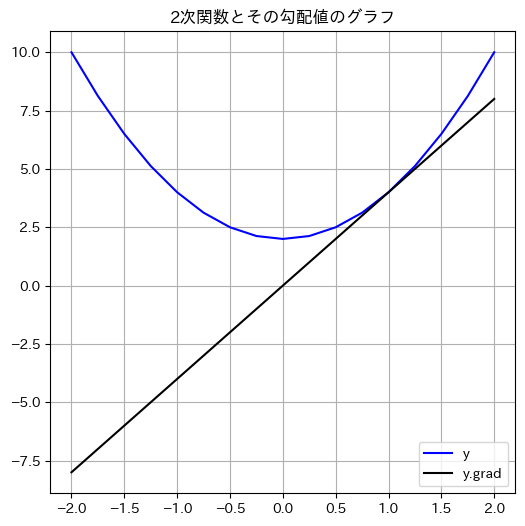

In [7]:
# 2次関数とその勾配値のグラフ

plt.figure(figsize=(6,6))
plt.plot(x.data, y.data, c='b', label='y')
plt.plot(x.data, x.grad.data, c='k', label='y.grad')
plt.legend()
plt.grid()
plt.title('2次関数とその勾配値のグラフ')
create_pdf()
plt.show()

#### 計算グラフの可視化

fig-11-03


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

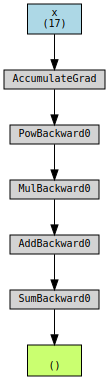

In [8]:
# 計算グラフの可視化

# 必要ライブラリのインポート
from torchviz import make_dot

# 可視化関数の呼び出し
g= make_dot(z, params={'x': x})
graph_pdf(g)
display(g)

### バージョン確認

In [ ]:
!pip install watermark -qq
%load_ext watermark
%watermark --iversions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 4.6 MB/s eta 0:00:00
google             : 2.0.3
pandas             : 2.2.2
matplotlib_inline  : 0.1.7
torchviz           : 0.0.3
japanize_matplotlib: 1.1.3
IPython            : 7.34.0
matplotlib         : 3.10.0
torch              : 2.8.0+cu126
numpy              : 2.0.2
torchinfo          : 1.8.0

